# Spam detection

<a target="_blank" href="https://colab.research.google.com/github/LuisAngelMendozaVelasco/luisangelmendozavelasco.github.io/blob/master/_portfolio/Applied_Data_Science_with_Python_Specialization/portfolio-5.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>

**Objective**: Explore the [SMS Spam Collection](https://archive.ics.uci.edu/dataset/228/sms+spam+collection) and create models to predict if a message is spam or not.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score, ConfusionMatrixDisplay, classification_report
from sklearn.svm import SVC
from scipy.sparse import csr_matrix, hstack
from sklearn.linear_model import LogisticRegression

## Load the data

In [2]:
df_spam_data = pd.read_csv('https://raw.githubusercontent.com/LuisAngelMendozaVelasco/Applied_Data_Science_with_Python_Specialization/main/Applied_Text_Mining_in_Python/Week3/Labs/data/spam.csv')
df_spam_data['target'] = np.where(df_spam_data['target'] == 'spam', 1, 0)
df_spam_data

,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will Ì_ b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


## Visualize the class distribution

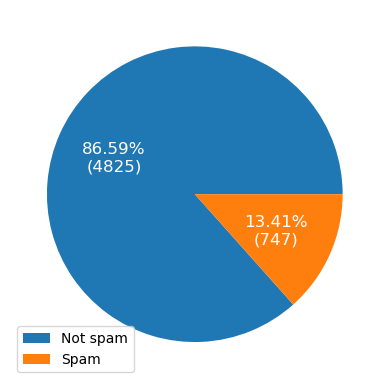

In [3]:
spam = df_spam_data["target"].sum()
not_spam = len(df_spam_data) - spam
labels = ["Not spam", "Spam"]
sizes = [not_spam, spam]

fig, ax = plt.subplots()
ax.pie(sizes, textprops={'fontsize': '12', 'color': 'w'}, autopct=lambda pct: "{:.2f}%\n({:d})".format(pct, round(pct/100 * sum(sizes))))
ax.legend(labels)
plt.show()

## Split the data into training and test sets

In [4]:
X = df_spam_data['text']
y = df_spam_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Fit a Count Vectorizer using the training data

What is the longest token in the vocabulary?

In [5]:
count_vectorizer = CountVectorizer().fit(X_train)
tokens = [(token, len(token)) for token in count_vectorizer.vocabulary_.keys()]
pd.DataFrame(sorted(tokens, key=lambda item: item[1], reverse=True)[:10], columns=["token", "lenght"])

,token,lenght
0,com1win150ppmx3age16subscription,32
1,minmoremobsemspobox45po139wa,28
2,50pmmorefrommobile2bremoved,27
3,minmobsmorelkpobox177hp51fl,27
4,callcost150ppmmobilesvary,25
5,150ppmpobox10183bhamb64xe,25
6,150ppermesssubscription,23
7,datebox1282essexcm61xn,22
8,tscs087147403231winawk,22
9,boughtåóbraindanceåóa,21


## Fit a multinomial Naive Bayes classifier

- Transform the datasets using the Count Vectorizer.
- Find the Area Under the Receiver Operating Characteristic Curve (ROC AUC) using the transformed test datasets.

In [6]:
X_train_vectorized = count_vectorizer.transform(X_train)
X_test_vectorized = count_vectorizer.transform(X_test)

multinomialNB_classifier = MultinomialNB(alpha=0.1).fit(X_train_vectorized, y_train)

In [7]:
y_pred = multinomialNB_classifier.predict(X_test_vectorized)
roc_auc = roc_auc_score(y_test, y_pred)

print(classification_report(y_test, y_pred, digits=4))
print("Area Under the Receiver Operating Characteristic Curve (ROC AUC) = {:.4f}".format(roc_auc))

              precision    recall  f1-score   support

           0     0.9909    1.0000    0.9954      1196
           1     1.0000    0.9442    0.9713       197

    accuracy                         0.9921      1393
   macro avg     0.9954    0.9721    0.9834      1393
weighted avg     0.9922    0.9921    0.9920      1393

Area Under the Receiver Operating Characteristic Curve (ROC AUC) = 0.9721


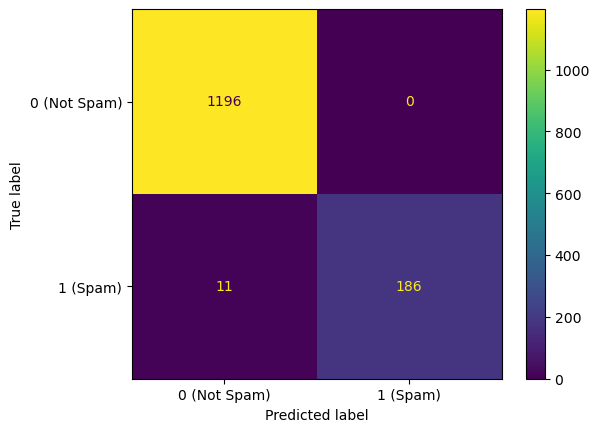

In [8]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["0 (Not Spam)", "1 (Spam)"])
plt.show()

## Fit a TF-IDF Vectorizer using the training data

What 10 features have the smallest TF-IDF ([Term Frequency–Inverse Document Frequency](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)) and what 10 have the largest TF-IDF?

In [9]:
tfidf_vectorizer = TfidfVectorizer().fit(X_train)
feature_names_idfs = list(zip(tfidf_vectorizer.get_feature_names_out(), tfidf_vectorizer.idf_))
smallest_idfs = sorted(feature_names_idfs, key=lambda item: item[1])[:10]
largest_idfs = sorted(feature_names_idfs, key=lambda item: item[1], reverse=True)[:10]

In [10]:
print("Smallest TF-IDF:")
pd.DataFrame(smallest_idfs, columns=["Token", "IDF"]).set_index("Token")

Smallest TF-IDF:


,IDF
Token,
to,2.198406
you,2.265645
the,2.707383
in,2.890761
and,2.976764
is,3.003012
me,3.111530
for,3.206840
it,3.222174


In [11]:
print("Largest TF-IDF:")
pd.DataFrame(largest_idfs, columns=["Token", "IDF"]).set_index("Token")

Largest TF-IDF:


,IDF
Token,
000pes,8.644919
0089,8.644919
0121,8.644919
01223585236,8.644919
0125698789,8.644919
02072069400,8.644919
02073162414,8.644919
02085076972,8.644919
021,8.644919


## Fit a multinomial Naive Bayes classifier

- Transform the datasets using the TF-IDF Vectorizer.
- Ignore terms that have a document frequency lower than 3.

In [12]:
tfidf_vectorizer = TfidfVectorizer(min_df=3).fit(X_train)
X_train_vectorized = tfidf_vectorizer.transform(X_train)
X_test_vectorized = tfidf_vectorizer.transform(X_test)

multinomialNB_classifier = MultinomialNB(alpha=0.1).fit(X_train_vectorized, y_train)

In [13]:
y_pred = multinomialNB_classifier.predict(X_test_vectorized)
roc_auc = roc_auc_score(y_test, y_pred)

print(classification_report(y_test, y_pred, digits=4))
print("Area Under the Receiver Operating Characteristic Curve (ROC AUC) = {:.4f}".format(roc_auc))

              precision    recall  f1-score   support

           0     0.9811    1.0000    0.9905      1196
           1     1.0000    0.8832    0.9380       197

    accuracy                         0.9835      1393
   macro avg     0.9906    0.9416    0.9642      1393
weighted avg     0.9838    0.9835    0.9831      1393

Area Under the Receiver Operating Characteristic Curve (ROC AUC) = 0.9416


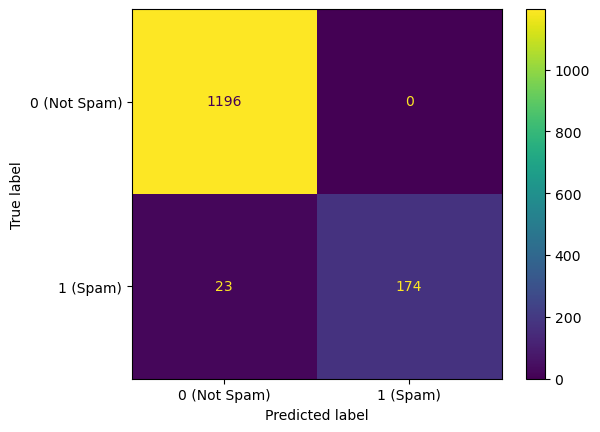

In [14]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["0 (Not Spam)", "1 (Spam)"])
plt.show()

## Get the average number of characters for not spam and spam documents

In [15]:
df_spam_data['length'] = df_spam_data['text'].apply(lambda txt: len(txt))
not_spam_mean_length = np.mean(df_spam_data[df_spam_data['target'] == 0]['length'])
spam_mean_length = np.mean(df_spam_data[df_spam_data['target'] == 1]['length'])

print("Average length of spam documents: {:.2f}".format(spam_mean_length))
print("Average length of not spam documents: {:.2f}".format(not_spam_mean_length))

Average length of spam documents: 138.87
Average length of not spam documents: 71.02


## Create a function to combine new features into the datasets

In [16]:
def add_feature(X, feature_to_add):
    """
    Returns sparse feature matrix with added feature.
    feature_to_add can also be a list of features.
    """
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

## Fit a Support Vector Classifier (SVC)

- Transform the datasets using the TF-IDF Vectorizer.
- Ignore terms that have a document frequency lower than 5.
- Use the number of characters as an additional feature.

In [17]:
tfidf_vectorizer = TfidfVectorizer(min_df=5).fit(X_train)
X_train_vectorized = tfidf_vectorizer.transform(X_train)
X_train_vectorized = add_feature(X_train_vectorized, X_train.str.len())
X_test_vectorized = tfidf_vectorizer.transform(X_test)
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.len())

svc = SVC(C=10000).fit(X_train_vectorized, y_train)

In [18]:
y_pred = svc.predict(X_test_vectorized)
roc_auc = roc_auc_score(y_test, y_pred)

print(classification_report(y_test, y_pred, digits=4))
print("Area Under the Receiver Operating Characteristic Curve (ROC AUC) = {:.4f}".format(roc_auc))

              precision    recall  f1-score   support

           0     0.9892    0.9983    0.9938      1196
           1     0.9892    0.9340    0.9608       197

    accuracy                         0.9892      1393
   macro avg     0.9892    0.9662    0.9773      1393
weighted avg     0.9892    0.9892    0.9891      1393

Area Under the Receiver Operating Characteristic Curve (ROC AUC) = 0.9662


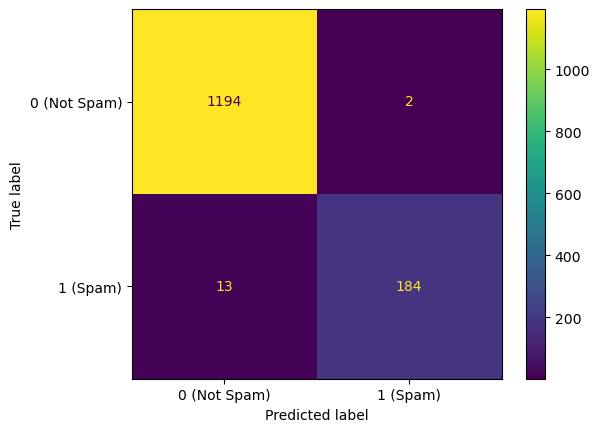

In [19]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["0 (Not Spam)", "1 (Spam)"])
plt.show()

## Get the average number of digits for not spam and spam documents

In [20]:
df_spam_data['digits'] = df_spam_data['text'].apply(lambda txt: len([char for char in txt if char.isdigit()]))
not_spam_mean_digits = np.mean(df_spam_data[df_spam_data['target'] == 0]['digits'])
spam_mean_digits = np.mean(df_spam_data[df_spam_data['target'] == 1]['digits'])

print("Average number of digits in spam documents: {:.2f}".format(spam_mean_digits))
print("Average number of digits in not spam documents: {:.2f}".format(not_spam_mean_digits))

Average number of digits in spam documents: 15.76
Average number of digits in not spam documents: 0.30


## Fit a Logistic Regression Classifier

- Transform the datasets using the TF-IDF Vectorizer.
- Ignore terms that have a document frequency lower than 5.
- Use word n-grams from n = 1 to n = 3 (unigrams, bigrams, and trigrams).
- Use the number of characters and digits as additional features.

In [21]:
tfidf_vectorizer = TfidfVectorizer(min_df=5, ngram_range=(1, 3)).fit(X_train)
X_train_vectorized = tfidf_vectorizer.transform(X_train)
X_train_vectorized = add_feature(X_train_vectorized, [X_train.str.len(), X_train.str.findall(r'\d').str.len()])
X_test_vectorized = tfidf_vectorizer.transform(X_test)
X_test_vectorized = add_feature(X_test_vectorized, [X_test.str.len(), X_test.str.findall(r'\d').str.len()])

logistic_regression_classifier = LogisticRegression(C=100, max_iter=1000).fit(X_train_vectorized, y_train)

In [22]:
y_pred = logistic_regression_classifier.predict(X_test_vectorized)
roc_auc = roc_auc_score(y_test, y_pred)

print(classification_report(y_test, y_pred, digits=4))
print("Area Under the Receiver Operating Characteristic Curve (ROC AUC) = {:.4f}".format(roc_auc))

              precision    recall  f1-score   support

           0     0.9900    0.9967    0.9933      1196
           1     0.9788    0.9391    0.9585       197

    accuracy                         0.9885      1393
   macro avg     0.9844    0.9679    0.9759      1393
weighted avg     0.9884    0.9885    0.9884      1393

Area Under the Receiver Operating Characteristic Curve (ROC AUC) = 0.9679


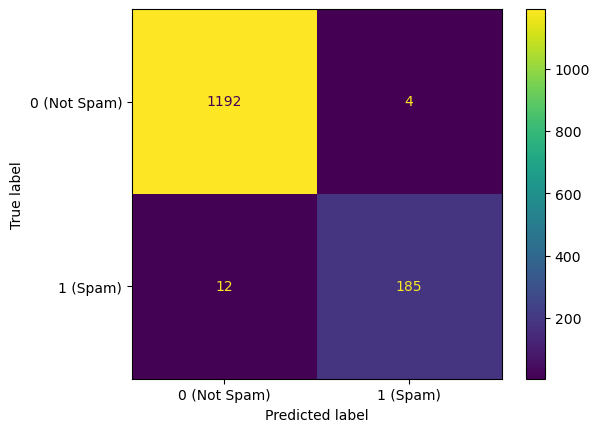

In [23]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["0 (Not Spam)", "1 (Spam)"])
plt.show()

## Get the average number non-word characters for not spam and spam documents

In [24]:
df_spam_data['non_word'] = df_spam_data['text'].str.findall(r'\W').str.len()
not_spam_mean_non_word = np.mean(df_spam_data[df_spam_data['target'] == 0]['non_word'])
spam_mean_non_word = np.mean(df_spam_data[df_spam_data['target'] == 1]['non_word'])

print("Average number of non_word in spam documents: {:.2f}".format(spam_mean_non_word))
print("Average number of non_word in not spam documents: {:.2f}".format(not_spam_mean_non_word))

Average number of non_word in spam documents: 29.04
Average number of non_word in not spam documents: 17.29


## Fit a Logistic Regression Classifier

- Transform the datasets using the Count Vectorizer.
- Ignore terms that have a document frequency lower than 5.
- Use word n-grams from n = 2 to n = 5.
- Use the number of characters, digits and non-words as additional features.

In [25]:
count_vectorizer = CountVectorizer(min_df=5, ngram_range=(2, 5), analyzer='char_wb').fit(X_train)
X_train_vectorized = count_vectorizer.transform(X_train)
X_train_vectorized = add_feature(X_train_vectorized, [X_train.str.len(), X_train.str.findall(r'\d').str.len(), X_train.str.findall(r'\W').str.len()])
X_test_vectorized = count_vectorizer.transform(X_test)
X_test_vectorized = add_feature(X_test_vectorized, [X_test.str.len(), X_test.str.findall(r'\d').str.len(), X_test.str.findall(r'\W').str.len()])

logistic_regression_classifier = LogisticRegression(C=100, max_iter=1000).fit(X_train_vectorized, y_train)

In [26]:
y_pred = logistic_regression_classifier.predict(X_test_vectorized)
roc_auc = roc_auc_score(y_test, y_pred)

print(classification_report(y_test, y_pred, digits=4))
print("Area Under the Receiver Operating Characteristic Curve (ROC AUC) = {:.4f}".format(roc_auc))

              precision    recall  f1-score   support

           0     0.9942    0.9967    0.9954      1196
           1     0.9794    0.9645    0.9719       197

    accuracy                         0.9921      1393
   macro avg     0.9868    0.9806    0.9836      1393
weighted avg     0.9921    0.9921    0.9921      1393

Area Under the Receiver Operating Characteristic Curve (ROC AUC) = 0.9806


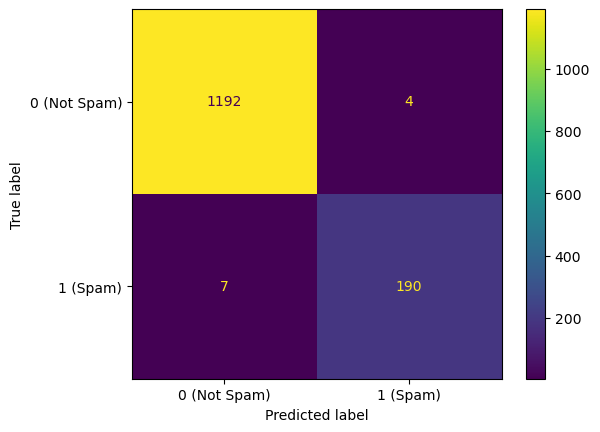

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["0 (Not Spam)", "1 (Spam)"])
plt.show()